In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn import metrics
from time import time
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

In [2]:
data = np.array([[6.5,25,1],[6.6,24.5,1],[6.9,24.2,1],[7.5,24.5,1],[8.4,24,0],[8.2,24.9,1],[7.5,25,1],[7.2,25.5,1],[7,26.3,1],[7.5,26.2,1],[7.9,26.5,1],[8,26,0],[7.6,25,1],[7,26,1],
      [6.2,24.8,1],[6.6,24,1],[6.7,24,1],[7.1,24.6,1],[8.5,24.1,0],[8.3,24.8,1],[7.9,25.2,1],[7.6,25.8,1],[7.4,26.3,1],[7.5,26.4,1],[7.8,26.2,1],[8.1,25.9,0],[7.5,25.5,1],[7.8,26,1],
      [6.3,25,1],[6.5,24.7,1],[6.7,24.4,1],[7.5,24.1,1],[8.4,24,0],[8.2,24.8,1],[8,25,1],[7.9,25.5,1],[7.3,25.8,1],[7,26.1,1],[7.7,26.2,1],[8.1,26,0],[7.3,25.5,1],[7,25,1],
      [6.6,25,1],[6.7,24.5,1],[6.9,24.2,1],[7.5,23.9,1],[8.5,23.8,0],[8.2,24,1],[7.5,25,1],[7.2,25.5,1],[7.1,26.3,1],[7.4,26.2,1],[7.9,26.2,1],[8.1,26,0],[7.6,25.5,1],[7,25,1],
      [6.7,24.9,1],[6.8,24.4,1],[7,24,1],[7.4,24.4,1],[8.3,24,0],[8.2,24.8,1],[7.4,25.1,1],[7.3,25.4,1],[7.2,26.1,1],[7.3,26.2,1],[8,26.2,1],[8,26.2,0],[7.6,25.7,1],[7.1,24.9,1],
      [6.8,24.9,1],[6.7,24.5,1],[6.9,24.5,1],[7.2,24.4,1],[8.1,24.2,1],[8.4,24,0],[7.2,25,1],[7.4,25.6,1],[7.2,26.2,1],[7.9,26.2,1],[8.1,26,0],[7.9,26,1],[7.5,25.5,1],[7,25,1],
      [6.7,25,1],[6.7,25,1],[6.2,24.5,1],[7.1,24.8,1],[8.3,25.2,1],[8.4,23.9,0],[7.5,25.1,1],[7.1,25.4,1],[7.1,26.3,1],[7.4,26.5,1],[8,26,0],[7.9,25.3,1],[7.3,25,1],[7.2,24.8,1],
      [6.8,25,1],[6.9,24.5,1],[7,24.2,1],[7.2,24.1,1],[7.8,24.1,1],[8.3,23.8,0],[8.1,24.5,1],[7.4,25.5,1],[7.3,26,1],[7.6,26,1],[8.2,25.9,0],[7.1,25.5,1],[7.8,25,1],[7.4,25.2,1],
      [6.9,24.9,1],[6.9,24.4,1],[7.1,24.1,1],[7.2,24.1,1],[7.7,24.1,1],[8.5,24,0],[8.2,24.4,1],[7.3,25,1],[7.3,25.5,1],[7.6,26,1],[8.1,26.1,0],[8.1,25.5,1],[7.8,25.5,1],[7.5,25.5,1]])

In [3]:
np.random.shuffle(data)

In [4]:
X=data[:,0:2]
y=data[:,2]
#Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [5]:
def run(X_train, X_test, y_train):
    lr = LogisticRegression()
    lr.fit(X_train,y_train)
    y_pred1_lr = lr.predict(X_test)

    knn = KNeighborsClassifier()
    knn.fit(X_train, y_train)
    y_pred1_knn = knn.predict(X_test)

    tree = DecisionTreeClassifier()
    tree.fit(X_train, y_train)
    y_pred1_dt = tree.predict(X_test)

    rand_forest = RandomForestClassifier()
    rand_forest.fit(X_train, y_train)
    y_pred1_rf = rand_forest.predict(X_test)

    gbrt = GradientBoostingClassifier()
    gbrt.fit(X_train, y_train)
    y_pred1_gb = gbrt.predict(X_test)

    svc = SVC()
    svc.fit(X_train, y_train)
    y_pred1_svm = svc.predict(X_test)

    mlp = MLPClassifier()
    mlp.fit(X_train, y_train)
    y_pred1_nn = tree.predict(X_test)

    return [y_pred1_lr, y_pred1_knn, y_pred1_dt, y_pred1_rf, y_pred1_gb, y_pred1_svm, y_pred1_nn]

In [6]:
accuracy = np.zeros((9, 7), dtype=np.float64)
precision = np.zeros((9, 7), dtype=np.float64)
recall = np.zeros((9, 7), dtype=np.float64)
f1 = np.zeros((9, 7), dtype=np.float64)

days = 9
m = int(len(X) / days)

for i in range(1, days+1):
    # on each day
    k = int(m*i)
    X_i = X[:k]
    y_i = y[:k]
    X_train_i, X_test_i, y_train_i, y_test_i = train_test_split(X_i, y_i, test_size = 0.15)
    y_pred_i = run(X_train_i, X_test_i, y_train_i)
    for j in range(7):
        k = i - 1
        # for each algorithm
        accuracy[k][j] = metrics.accuracy_score(y_test_i,y_pred_i[j])*100
        precision[k][j] = metrics.precision_score(y_test_i,y_pred_i[j])*100
        recall[k][j] = metrics.recall_score(y_test_i,y_pred_i[j])*100
        f1[k][j] = metrics.f1_score(y_test_i,y_pred_i[j])*100
    

c:\Users\lenovo\anaconda3\envs\Sepehr\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\lenovo\anaconda3\envs\Sepehr\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\lenovo\anaconda3\envs\Sepehr\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\lenovo\anaconda3\envs\Sepehr\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\lenovo\anac

In [7]:
days_list = [i+1 for i in range(days)]
days_list = np.array(days_list)
days_list = np.insert(days_list, [0], [0])

In [8]:
accuracy.shape

(9, 7)

In [9]:
# print(np.insert(accuracy,[0,1,2,3,4,5,6],[0]))
accuracy = np.insert(accuracy,[0],[0], axis=0)
precision = np.insert(precision,[0],[0], axis=0)
recall = np.insert(recall,[0],[0], axis=0)
f1 = np.insert(f1,[0],[0], axis=0)

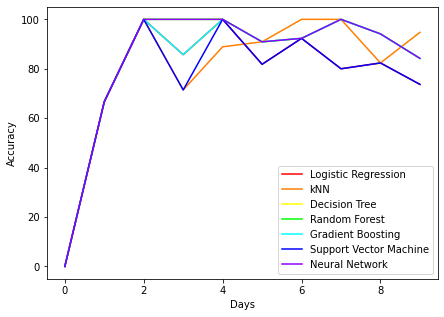

In [10]:
plt.figure(figsize=(7,5))
plt.plot(days_list, accuracy[:,0], color = "#ff0000", label = "Logistic Regression")
plt.plot(days_list, accuracy[:,1], color = "#ff7f00", label = "kNN")
plt.plot(days_list, accuracy[:,2], color = "#ffff00", label = "Decision Tree")
plt.plot(days_list, accuracy[:,3], color = "#00ff00", label = "Random Forest")
plt.plot(days_list, accuracy[:,4], color = "#00ffff", label = "Gradient Boosting")
plt.plot(days_list, accuracy[:,5], color = "#0000ff", label = "Support Vector Machine")
plt.plot(days_list, accuracy[:,6], color = "#8b00ff", label = "Neural Network")
plt.legend(loc='lower right')
plt.xlabel("Days")
plt.ylabel("Accuracy")
plt.show()

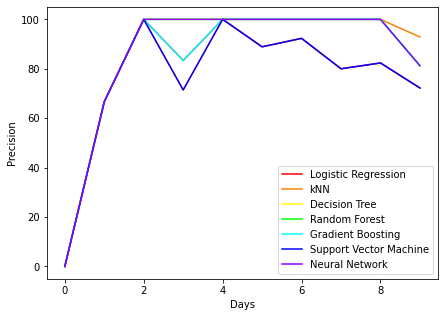

In [11]:
plt.figure(figsize=(7,5))
plt.plot(days_list, precision[:,0], color = "#ff0000", label = "Logistic Regression")
plt.plot(days_list, precision[:,1], color = "#ff7f00", label = "kNN")
plt.plot(days_list, precision[:,2], color = "#ffff00", label = "Decision Tree")
plt.plot(days_list, precision[:,3], color = "#00ff00", label = "Random Forest")
plt.plot(days_list, precision[:,4], color = "#00ffff", label = "Gradient Boosting")
plt.plot(days_list, precision[:,5], color = "#0000ff", label = "Support Vector Machine")
plt.plot(days_list, precision[:,6], color = "#8b00ff", label = "Neural Network")
plt.legend(loc='lower right')
plt.xlabel("Days")
plt.ylabel("Precision")
plt.show()

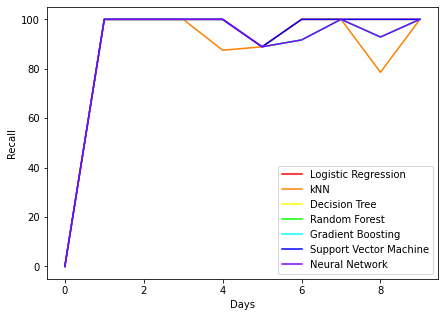

In [12]:
plt.figure(figsize=(7,5))
plt.plot(days_list, recall[:,0], color = "#ff0000", label = "Logistic Regression")
plt.plot(days_list, recall[:,1], color = "#ff7f00", label = "kNN")
plt.plot(days_list, recall[:,2], color = "#ffff00", label = "Decision Tree")
plt.plot(days_list, recall[:,3], color = "#00ff00", label = "Random Forest")
plt.plot(days_list, recall[:,4], color = "#00ffff", label = "Gradient Boosting")
plt.plot(days_list, recall[:,5], color = "#0000ff", label = "Support Vector Machine")
plt.plot(days_list, recall[:,6], color = "#8b00ff", label = "Neural Network")
plt.legend(loc='lower right')
plt.xlabel("Days")
plt.ylabel("Recall")
plt.show()

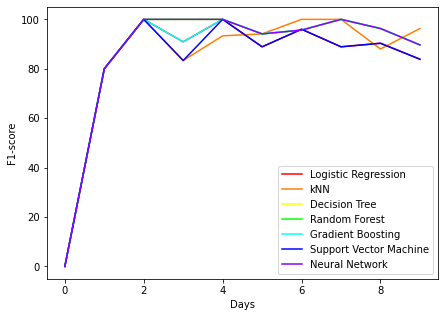

In [13]:
plt.figure(figsize=(7,5))
plt.plot(days_list, f1[:,0], color = "#ff0000", label = "Logistic Regression")
plt.plot(days_list, f1[:,1], color = "#ff7f00", label = "kNN")
plt.plot(days_list, f1[:,2], color = "#ffff00", label = "Decision Tree")
plt.plot(days_list, f1[:,3], color = "#00ff00", label = "Random Forest")
plt.plot(days_list, f1[:,4], color = "#00ffff", label = "Gradient Boosting")
plt.plot(days_list, f1[:,5], color = "#0000ff", label = "Support Vector Machine")
plt.plot(days_list, f1[:,6], color = "#8b00ff", label = "Neural Network")
plt.legend(loc='lower right')
plt.xlabel("Days")
plt.ylabel("F1-score")
plt.show()

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15)

print("Logistic regression")
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
start = time()
lr.fit(X_train,y_train)
end = time()
t1_train_lr = end - start
start = time()
y_pred1_lr = lr.predict(X_test)
end = time()
t1_test_lr = end - start
print(f"Logistic Regression's accuracy with standardisation :                   {metrics.accuracy_score(y_test,y_pred1_lr)*100} %")
print(f"Logistic Regression's precision with standardisation :                  {metrics.precision_score(y_test,y_pred1_lr)*100} %")
print(f"Logistic Regression's recall with standardisation :                     {metrics.recall_score(y_test,y_pred1_lr)*100} %")
print(f"Logistic Regression's f1_score with standardisation :                   {metrics.f1_score(y_test,y_pred1_lr)*100} %")
print(f"Logistic Regression's training time with standardisation :              {t1_train_lr} s")
print(f"Logistic Regression's testing time with standardisation :               {t1_test_lr} s")


print("\nk Nearest Neighbors")
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
start = time()
knn.fit(X_train, y_train)
end = time()
t1_train_knn = end - start
start = time()
y_pred1_knn = knn.predict(X_test)
end = time()
t1_test_knn = end - start
print(f"kNN's accuracy with standardisation :                                   {metrics.accuracy_score(y_test,y_pred1_knn)*100} %")
print(f"kNN's precision with standardisation :                                  {metrics.precision_score(y_test,y_pred1_knn)*100} %")
print(f"kNN's recall with standardisation :                                     {metrics.recall_score(y_test,y_pred1_knn)*100} %")
print(f"kNN's f1_score with standardisation :                                   {metrics.f1_score(y_test,y_pred1_knn)*100} %")
print(f"kNN's training time with standardisation :                              {t1_train_knn} s")
print(f"kNN's testing time with standardisation :                               {t1_test_knn} s")


print("\nDecision Tree")
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
start = time()
tree.fit(X_train, y_train)
end = time()
t1_train_dt = end - start
start = time()
y_pred1_dt = tree.predict(X_test)
end = time()
t1_test_dt = end - start
print(f"Decision Tree's accuracy with standardisation :                         {metrics.accuracy_score(y_test,y_pred1_dt)*100} %")
print(f"Decision Tree's precision with standardisation :                        {metrics.precision_score(y_test,y_pred1_dt)*100} %")
print(f"Decision Tree's recall with standardisation :                           {metrics.recall_score(y_test,y_pred1_dt)*100} %")
print(f"Decision Tree's f1_score with standardisation :                         {metrics.f1_score(y_test,y_pred1_dt)*100} %")
print(f"Decision Tree's training time with standardisation :                    {t1_train_dt} s")
print(f"Decision Tree's testing time with standardisation :                     {t1_test_dt} s")


print("\nRandom Forst")
from sklearn.ensemble import RandomForestClassifier
rand_forest = RandomForestClassifier()
start = time()
rand_forest.fit(X_train, y_train)
end = time()
t1_train_rf = end - start
start = time()
y_pred1_rf = rand_forest.predict(X_test)
end = time()
t1_test_rf = end - start
print(f"Random Forest's accuracy with standardisation :                         {metrics.accuracy_score(y_test,y_pred1_rf)*100} %")
print(f"Random Forest's precision with standardisation :                        {metrics.precision_score(y_test,y_pred1_rf)*100} %")
print(f"Random Forest's recall with standardisation :                           {metrics.recall_score(y_test,y_pred1_rf)*100} %")
print(f"Random Forest's f1_score with standardisation :                         {metrics.f1_score(y_test,y_pred1_rf)*100} %")
print(f"Random Forest's training time with standardisation :                    {t1_train_rf} s")
print(f"Random Forest's testing time with standardisation :                     {t1_test_rf} s")


print("\nGradient Boosting")
from sklearn.ensemble import GradientBoostingClassifier
gbrt = GradientBoostingClassifier()
start = time()
tree.fit(X_train, y_train)
end = time()
t1_train_gb = end - start
start = time()
y_pred1_gb = tree.predict(X_test)
end = time()
t1_test_gb = end - start
print(f"Gradient Boosting's accuracy with standardisation :                     {metrics.accuracy_score(y_test,y_pred1_gb)*100} %")
print(f"Gradient Boosting's precision with standardisation :                    {metrics.precision_score(y_test,y_pred1_gb)*100} %")
print(f"Gradient Boosting's recall with standardisation :                       {metrics.recall_score(y_test,y_pred1_gb)*100} %")
print(f"Gradient Boosting's f1_score with standardisation :                     {metrics.f1_score(y_test,y_pred1_gb)*100} %")
print(f"Gradient Boosting's training time with standardisation :                {t1_train_gb} s")
print(f"Gradient Boosting's testing time with standardisation :                 {t1_test_gb} s")


print("\nSupport Vector Machine")
from sklearn.svm import SVC
svc = SVC()
start = time()
svc.fit(X_train, y_train)
end = time()
t1_train_svm = end - start
start = time()
y_pred1_svm = svc.predict(X_test)
end = time()
t1_test_svm = end - start
print(f"Support Vector Machine's accuracy with standardisation :                {metrics.accuracy_score(y_test,y_pred1_svm)*100} %")
print(f"Support Vector Machine's precision with standardisation :               {metrics.precision_score(y_test,y_pred1_svm)*100} %")
print(f"Support Vector Machine's recall with standardisation :                  {metrics.recall_score(y_test,y_pred1_svm)*100} %")
print(f"Support Vector Machine's f1_score with standardisation :                {metrics.f1_score(y_test,y_pred1_svm)*100} %")
print(f"Support Vector Machine's training time with standardisation :           {t1_train_svm} s")
print(f"Support Vector Machine's testing time with standardisation :            {t1_test_svm} s")


print("\nNeural Network")
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier()
start = time()
tree.fit(X_train, y_train)
end = time()
t1_train_nn = end - start
start = time()
y_pred1_nn = tree.predict(X_test)
end = time()
t1_test_nn = end - start
print(f"Neural Network's accuracy with standardisation :                        {metrics.accuracy_score(y_test,y_pred1_nn)*100} %")
print(f"Neural Network's precision with standardisation :                       {metrics.precision_score(y_test,y_pred1_nn)*100} %")
print(f"Neural Network's recall with standardisation :                          {metrics.recall_score(y_test,y_pred1_nn)*100} %")
print(f"Neural Network's f1_score with standardisation :                        {metrics.f1_score(y_test,y_pred1_nn)*100} %")
print(f"Neural Network's training time with standardisation :                   {t1_train_nn} s")
print(f"Neural Network's testing time with standardisation :                    {t1_test_nn} s")

Logistic regression
Logistic Regression's accuracy with standardisation :                   100.0 %
Logistic Regression's precision with standardisation :                  100.0 %
Logistic Regression's recall with standardisation :                     100.0 %
Logistic Regression's f1_score with standardisation :                   100.0 %
Logistic Regression's training time with standardisation :              0.01001882553100586 s
Logistic Regression's testing time with standardisation :               0.0009963512420654297 s

k Nearest Neighbors
kNN's accuracy with standardisation :                                   94.73684210526315 %
kNN's precision with standardisation :                                  100.0 %
kNN's recall with standardisation :                                     94.11764705882352 %
kNN's f1_score with standardisation :                                   96.96969696969697 %
kNN's training time with standardisation :                              0.002992391586303711 

18
108


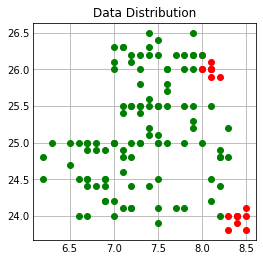

In [15]:
plt.figure(figsize=(4,4))
plt.style.use('_mpl-gallery')
plt.title("Data Distribution")

X = data[:,0:2]
y = data[:,2]
x1 = X[:,0]
x2 = X[:,1]

counter_0 = 0
counter_1 = 0
for i in range(len(X)):
    if y[i] == 0:
        plt.scatter(x1[i], x2[i], color="r")
        counter_0 += 1
    elif y[i] == 1:
        plt.scatter(x1[i], x2[i], color="g")
        counter_1 += 1
print(counter_0)
print(counter_1)

18
108


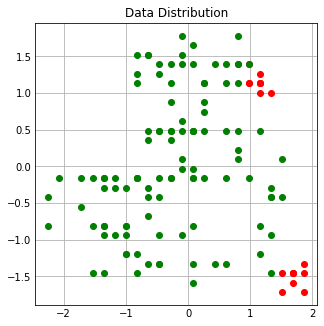

In [24]:
X=data[:,0:2]
y=data[:,2]
#Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
plt.figure(figsize=(4,4))
plt.style.use('_mpl-gallery')
plt.title("Data Distribution")

x1 = X[:,0]
x2 = X[:,1]

counter_0 = 0
counter_1 = 0
for i in range(len(X)):
    if y[i] == 0:
        plt.scatter(x1[i], x2[i], color="r")
        counter_0 += 1
    elif y[i] == 1:
        plt.scatter(x1[i], x2[i], color="g")
        counter_1 += 1
print(counter_0)
print(counter_1)

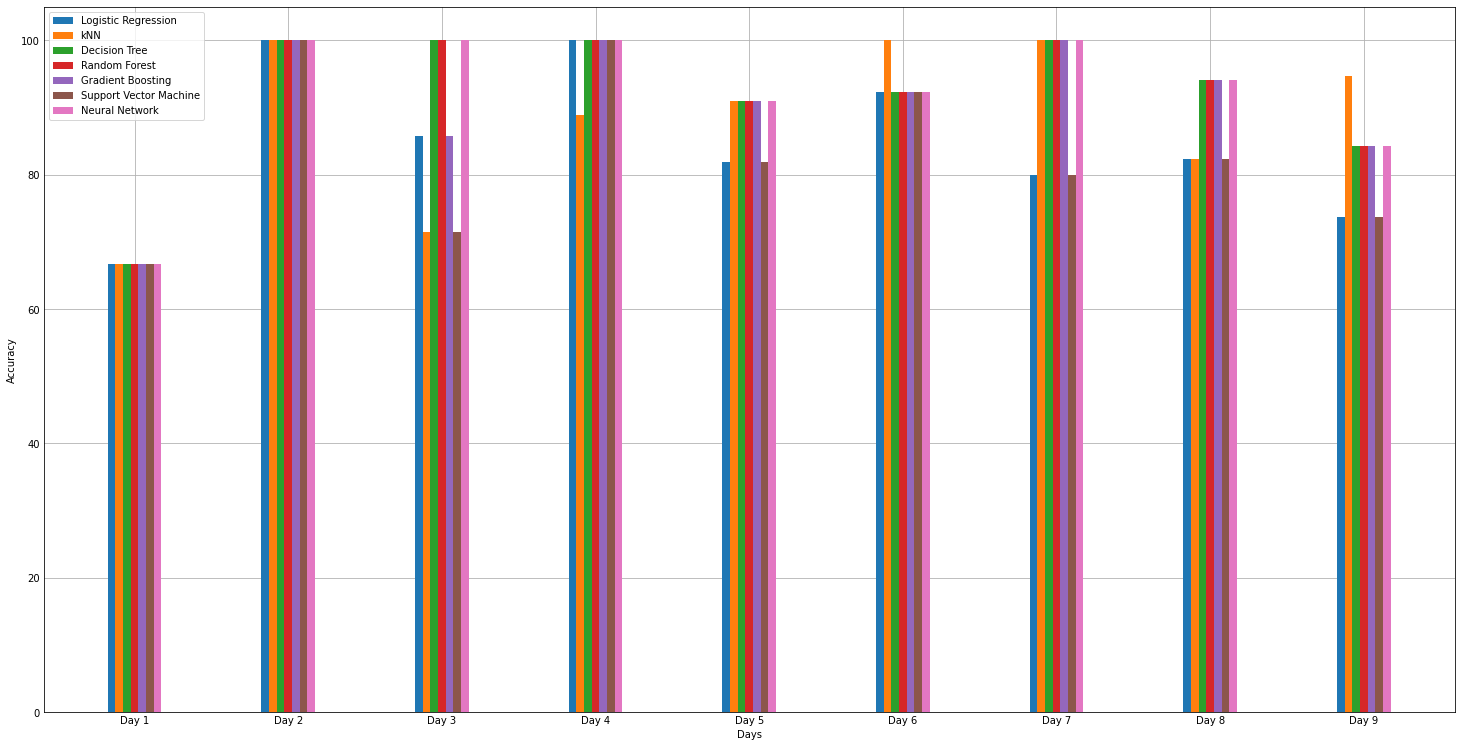

In [16]:
labels = ['Day 1', 'Day 2', 'Day 3', 'Day 4', 'Day 5', 'Day 6', 'Day 7', 'Day 8', 'Day 9']

x = np.arange(len(labels))  # the label locations
width = 0.05  # the width of the bars

plt.figure(figsize=(20,10))
plt.bar(x - (3*(width)), accuracy[1:,0], width, label='Logistic Regression')
plt.bar(x - (2*(width)), accuracy[1:,1], width, label='kNN')
plt.bar(x - width, accuracy[1:,2], width, label='Decision Tree')
plt.bar(x, accuracy[1:,3], width, label='Random Forest')
plt.bar(x + width, accuracy[1:,4], width, label='Gradient Boosting')
plt.bar(x + (2*(width)), accuracy[1:,5], width, label='Support Vector Machine')
plt.bar(x + ((3)*(width)), accuracy[1:,6], width, label='Neural Network')

plt.xticks(x, labels)
plt.xlabel("Days")
plt.ylabel("Accuracy")
plt.legend(loc='upper left')
plt.show()

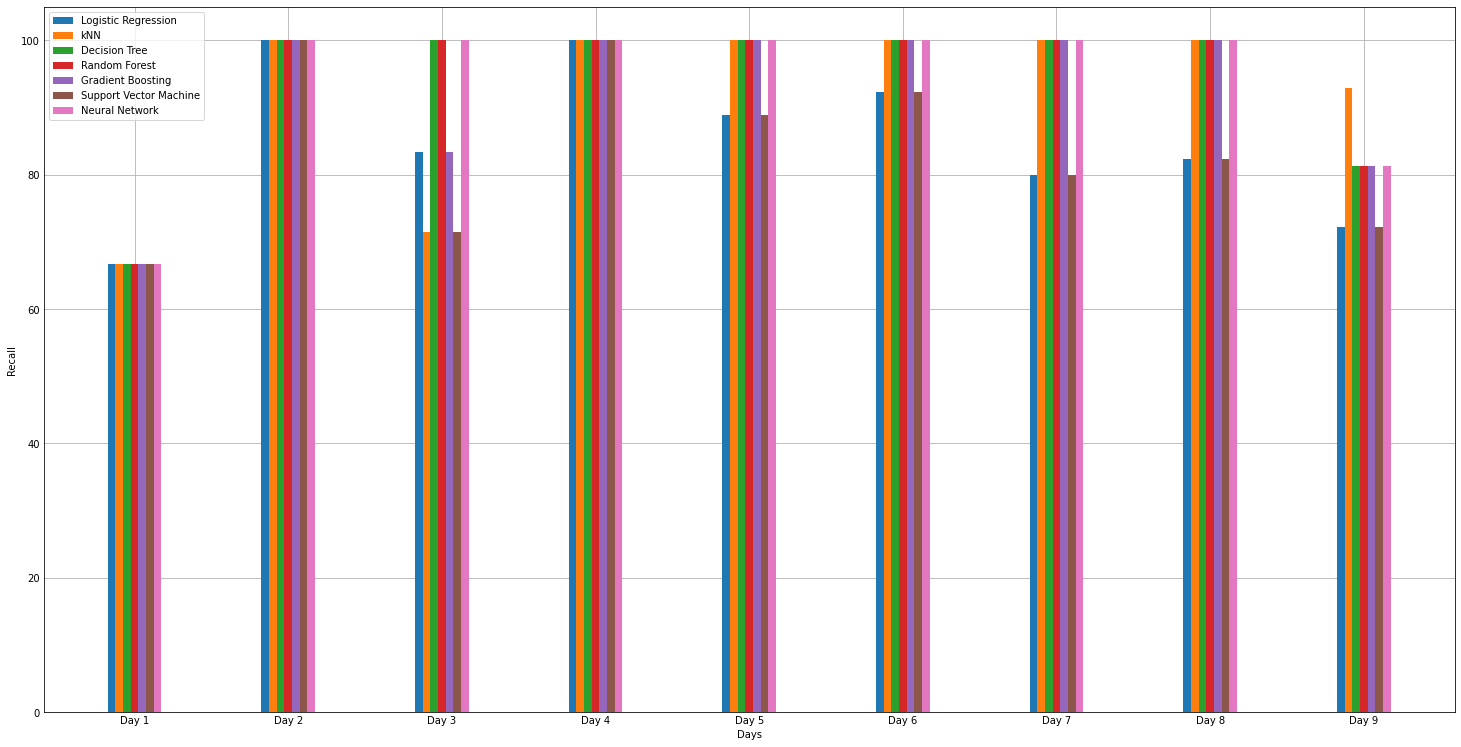

In [17]:
labels = ['Day 1', 'Day 2', 'Day 3', 'Day 4', 'Day 5', 'Day 6', 'Day 7', 'Day 8', 'Day 9']

x = np.arange(len(labels))  # the label locations
width = 0.05  # the width of the bars

plt.figure(figsize=(20,10))
plt.bar(x - (3*(width)), precision[1:,0], width, label='Logistic Regression')
plt.bar(x - (2*(width)), precision[1:,1], width, label='kNN')
plt.bar(x - width, precision[1:,2], width, label='Decision Tree')
plt.bar(x, precision[1:,3], width, label='Random Forest')
plt.bar(x + width, precision[1:,4], width, label='Gradient Boosting')
plt.bar(x + (2*(width)), precision[1:,5], width, label='Support Vector Machine')
plt.bar(x + ((3)*(width)), precision[1:,6], width, label='Neural Network')

plt.xticks(x, labels)
plt.xlabel("Days")
plt.ylabel("Recall")
plt.legend(loc='upper left')
plt.show()

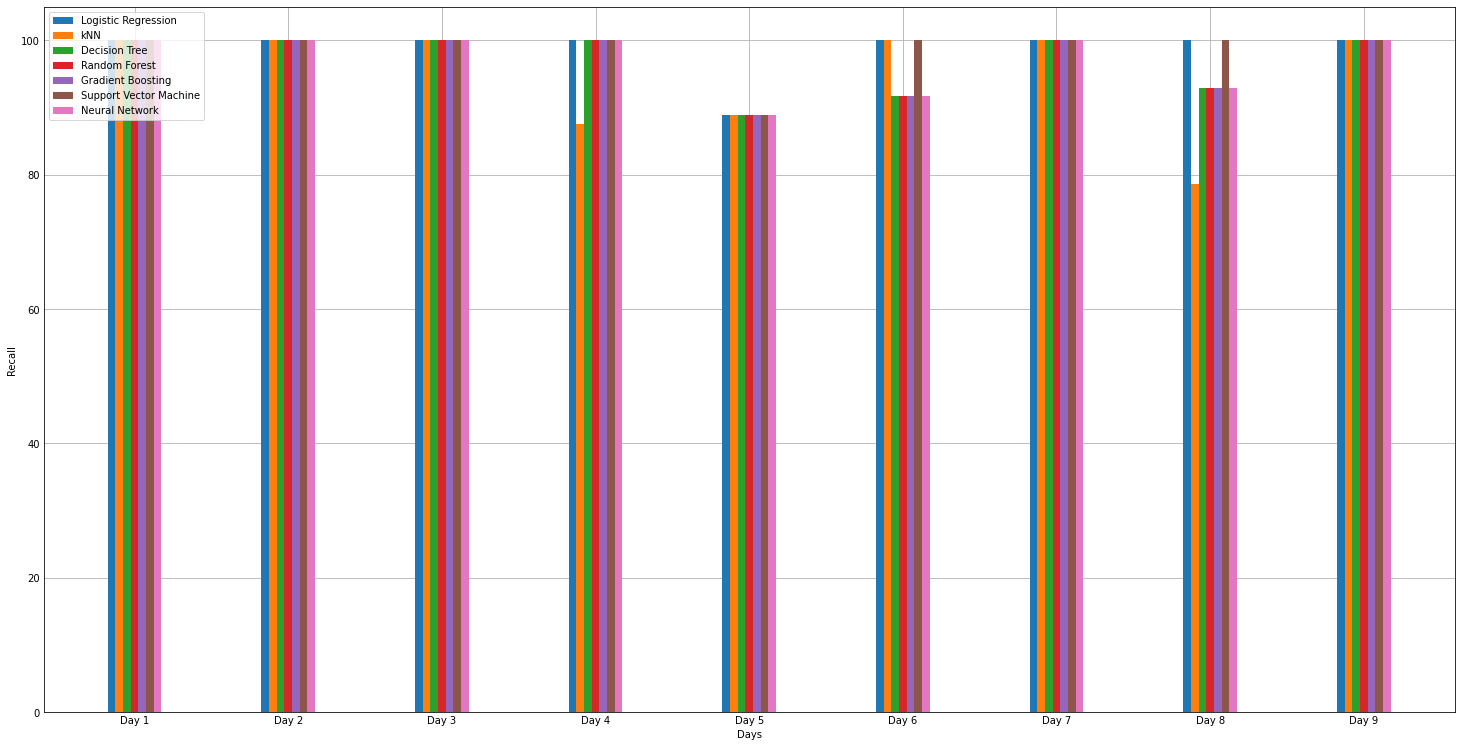

In [18]:
labels = ['Day 1', 'Day 2', 'Day 3', 'Day 4', 'Day 5', 'Day 6', 'Day 7', 'Day 8', 'Day 9']

x = np.arange(len(labels))  # the label locations
width = 0.05  # the width of the bars

plt.figure(figsize=(20,10))
plt.bar(x - (3*(width)), recall[1:,0], width, label='Logistic Regression')
plt.bar(x - (2*(width)), recall[1:,1], width, label='kNN')
plt.bar(x - width, recall[1:,2], width, label='Decision Tree')
plt.bar(x, recall[1:,3], width, label='Random Forest')
plt.bar(x + width, recall[1:,4], width, label='Gradient Boosting')
plt.bar(x + (2*(width)), recall[1:,5], width, label='Support Vector Machine')
plt.bar(x + ((3)*(width)), recall[1:,6], width, label='Neural Network')

plt.xticks(x, labels)
plt.xlabel("Days")
plt.ylabel("Recall")
plt.legend(loc='upper left')
plt.show()

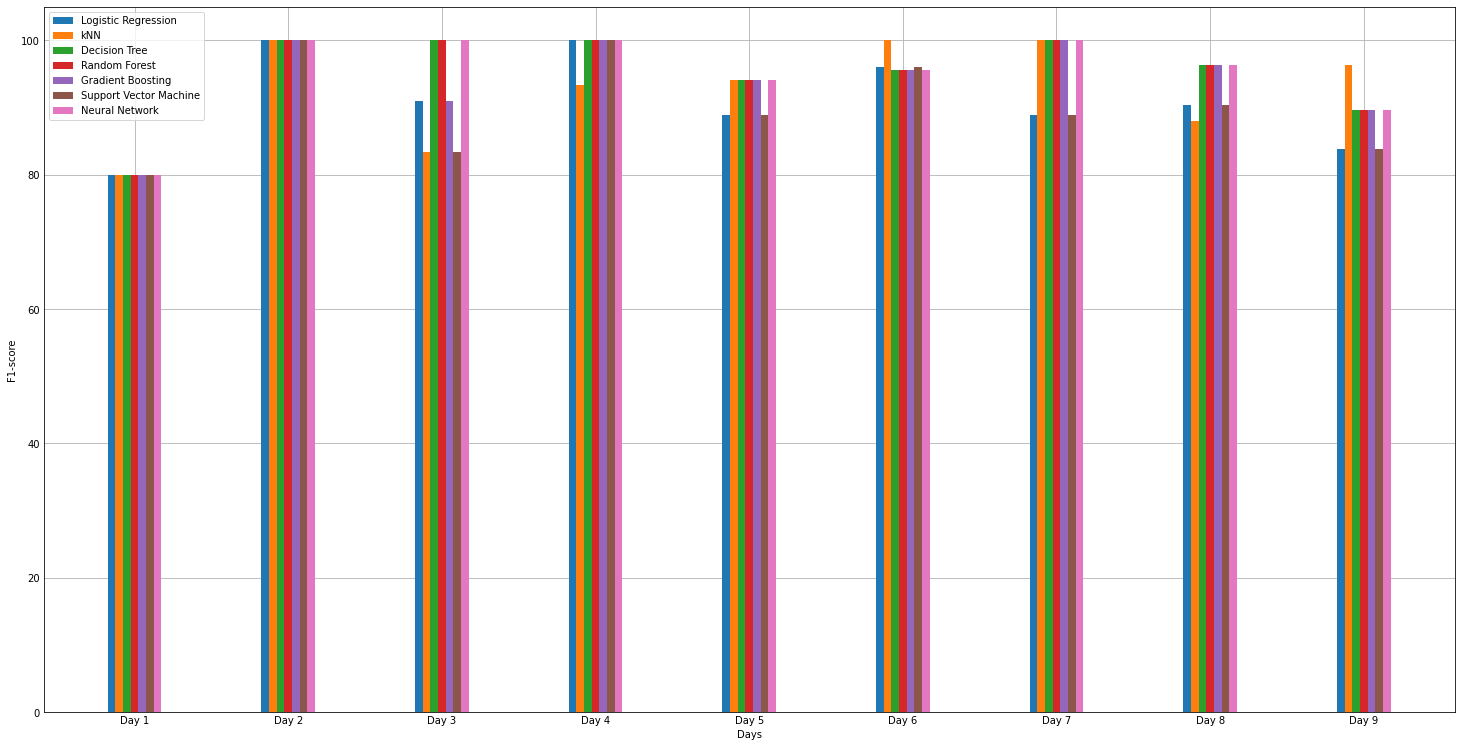

In [19]:
labels = ['Day 1', 'Day 2', 'Day 3', 'Day 4', 'Day 5', 'Day 6', 'Day 7', 'Day 8', 'Day 9']

x = np.arange(len(labels))  # the label locations
width = 0.05  # the width of the bars

plt.figure(figsize=(20,10))
plt.bar(x - (3*(width)), f1[1:,0], width, label='Logistic Regression')
plt.bar(x - (2*(width)), f1[1:,1], width, label='kNN')
plt.bar(x - width, f1[1:,2], width, label='Decision Tree')
plt.bar(x, f1[1:,3], width, label='Random Forest')
plt.bar(x + width, f1[1:,4], width, label='Gradient Boosting')
plt.bar(x + (2*(width)), f1[1:,5], width, label='Support Vector Machine')
plt.bar(x + ((3)*(width)), f1[1:,6], width, label='Neural Network')

plt.xticks(x, labels)
plt.xlabel("Days")
plt.ylabel("F1-score")
plt.legend(loc='upper left')
plt.show()

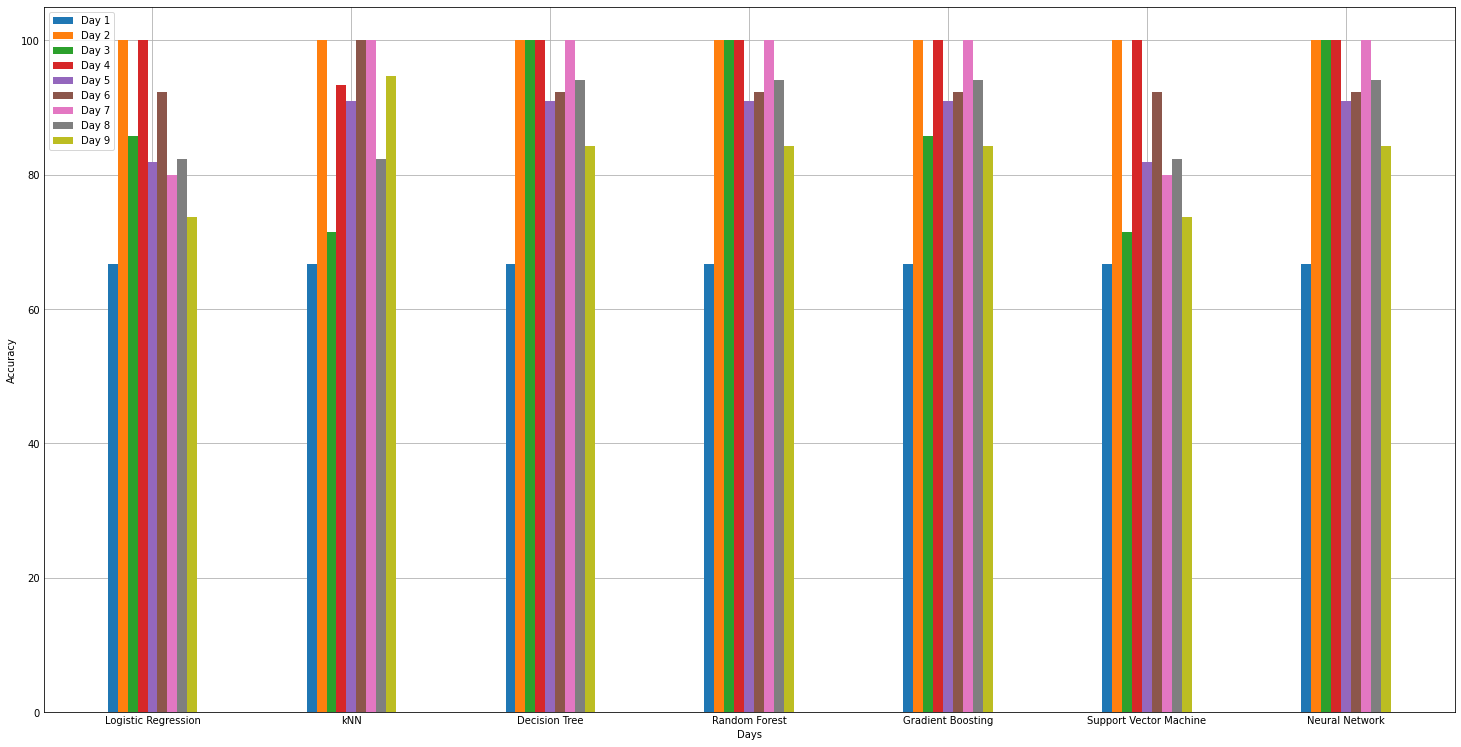

In [20]:
labels = ['Logistic Regression', 'kNN', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'Support Vector Machine', 'Neural Network']

x = np.arange(len(labels))  # the label locations
width = 0.05  # the width of the bars

plt.figure(figsize=(20,10))
plt.bar(x - (4*(width)), accuracy[1,:], width, label='Day 1')
plt.bar(x - (3*(width)), accuracy[2,:], width, label='Day 2')
plt.bar(x - (2*(width)), accuracy[3,:], width, label='Day 3')
plt.bar(x - (width), f1[4,:], width, label='Day 4')
plt.bar(x, accuracy[5,:], width, label='Day 5')
plt.bar(x + (1*(width)), accuracy[6,:], width, label='Day 6')
plt.bar(x + ((2)*(width)), accuracy[7,:], width, label='Day 7')
plt.bar(x + ((3)*(width)), accuracy[8,:], width, label='Day 8')
plt.bar(x + ((4)*(width)), accuracy[9,:], width, label='Day 9')

plt.xticks(x, labels)
plt.xlabel("Days")
plt.ylabel("Accuracy")
plt.legend(loc='upper left')
plt.show()

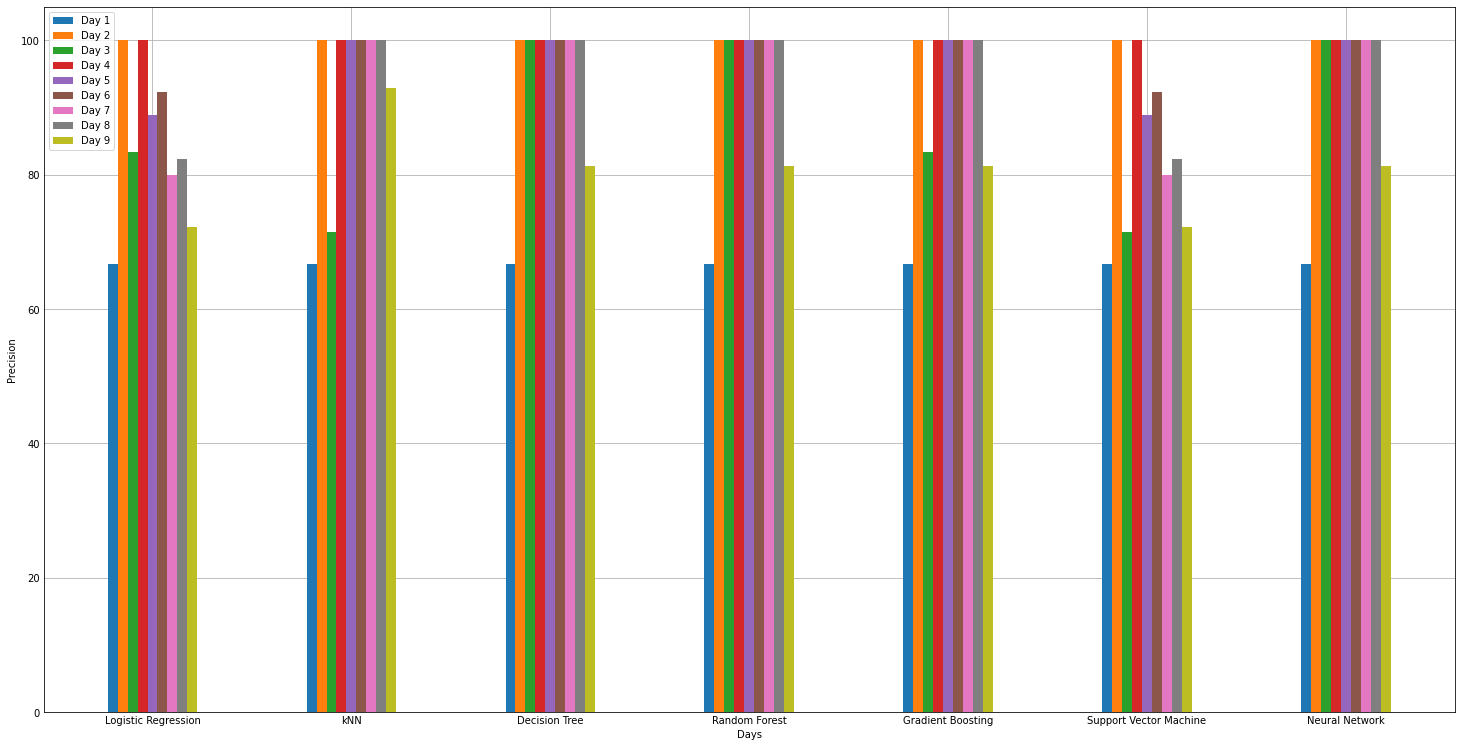

In [21]:
labels = ['Logistic Regression', 'kNN', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'Support Vector Machine', 'Neural Network']

x = np.arange(len(labels))  # the label locations
width = 0.05  # the width of the bars

plt.figure(figsize=(20,10))
plt.bar(x - (4*(width)), precision[1,:], width, label='Day 1')
plt.bar(x - (3*(width)), precision[2,:], width, label='Day 2')
plt.bar(x - (2*(width)), precision[3,:], width, label='Day 3')
plt.bar(x - (width), precision[4,:], width, label='Day 4')
plt.bar(x, precision[5,:], width, label='Day 5')
plt.bar(x + (1*(width)), precision[6,:], width, label='Day 6')
plt.bar(x + ((2)*(width)), precision[7,:], width, label='Day 7')
plt.bar(x + ((3)*(width)), precision[8,:], width, label='Day 8')
plt.bar(x + ((4)*(width)), precision[9,:], width, label='Day 9')

plt.xticks(x, labels)
plt.xlabel("Days")
plt.ylabel("Precision")
plt.legend(loc='upper left')
plt.show()

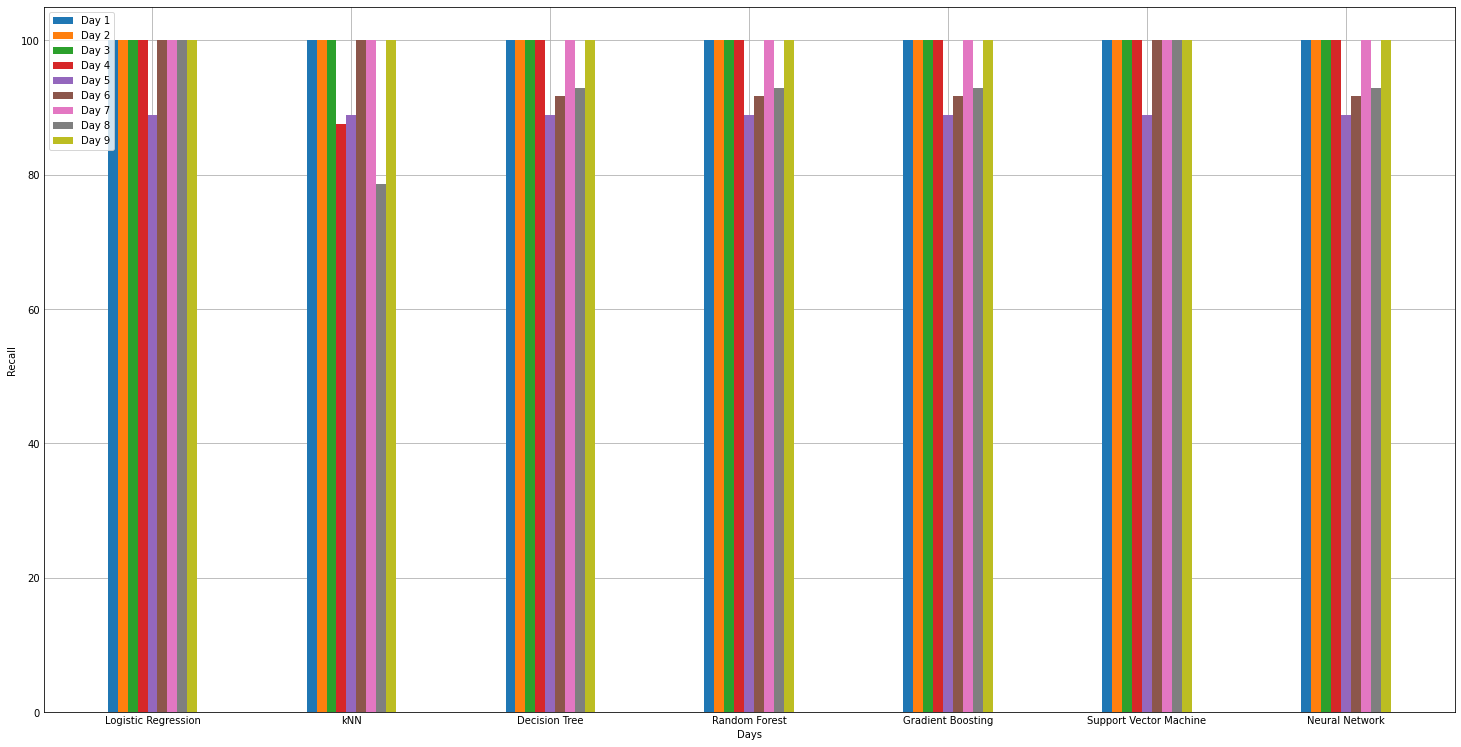

In [22]:
labels = ['Logistic Regression', 'kNN', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'Support Vector Machine', 'Neural Network']

x = np.arange(len(labels))  # the label locations
width = 0.05  # the width of the bars

plt.figure(figsize=(20,10))
plt.bar(x - (4*(width)), recall[1,:], width, label='Day 1')
plt.bar(x - (3*(width)), recall[2,:], width, label='Day 2')
plt.bar(x - (2*(width)), recall[3,:], width, label='Day 3')
plt.bar(x - (width), recall[4,:], width, label='Day 4')
plt.bar(x, recall[5,:], width, label='Day 5')
plt.bar(x + (1*(width)), recall[6,:], width, label='Day 6')
plt.bar(x + ((2)*(width)), recall[7,:], width, label='Day 7')
plt.bar(x + ((3)*(width)), recall[8,:], width, label='Day 8')
plt.bar(x + ((4)*(width)), recall[9,:], width, label='Day 9')

plt.xticks(x, labels)
plt.xlabel("Days")
plt.ylabel("Recall")
plt.legend(loc='upper left')
plt.show()

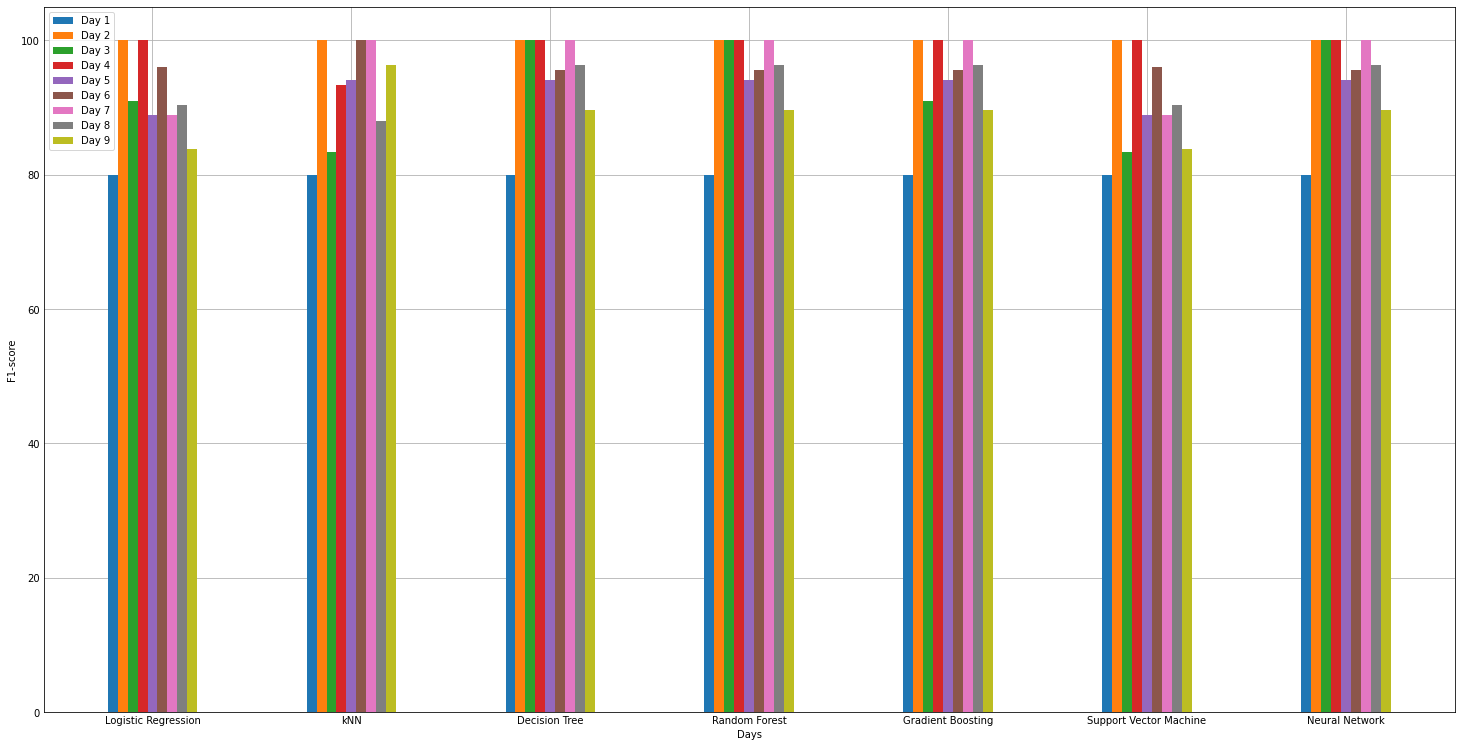

In [23]:
labels = ['Logistic Regression', 'kNN', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'Support Vector Machine', 'Neural Network']

x = np.arange(len(labels))  # the label locations
width = 0.05  # the width of the bars

plt.figure(figsize=(20,10))
plt.bar(x - (4*(width)), f1[1,:], width, label='Day 1')
plt.bar(x - (3*(width)), f1[2,:], width, label='Day 2')
plt.bar(x - (2*(width)), f1[3,:], width, label='Day 3')
plt.bar(x - (width), f1[4,:], width, label='Day 4')
plt.bar(x, f1[5,:], width, label='Day 5')
plt.bar(x + (1*(width)), f1[6,:], width, label='Day 6')
plt.bar(x + ((2)*(width)), f1[7,:], width, label='Day 7')
plt.bar(x + ((3)*(width)), f1[8,:], width, label='Day 8')
plt.bar(x + ((4)*(width)), f1[9,:], width, label='Day 9')

plt.xticks(x, labels)
plt.xlabel("Days")
plt.ylabel("F1-score")
plt.legend(loc='upper left')
plt.show()